# Datos Faltantes

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [4]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
89,-0.045472,-0.044642,-0.048241,-0.019442,-0.000193,-0.016032,0.067048,-0.039493,-0.024795,0.019633,111.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
277,-0.034575,-0.044642,-0.059019,0.001215,-0.053855,-0.078035,0.067048,-0.076395,-0.021395,0.015491,64.0
79,-0.103593,-0.044642,-0.037463,-0.026328,0.002559,0.019980,0.011824,-0.002592,-0.068332,-0.025930,113.0
175,0.067136,-0.044642,-0.038540,-0.026328,-0.031840,-0.026366,0.008142,-0.039493,-0.027129,0.003064,127.0
324,0.030811,-0.044642,0.005650,0.011544,0.078236,0.077913,-0.043401,0.108111,0.066051,0.019633,249.0
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046883,-0.079778,158.0
205,-0.030942,-0.044642,0.046607,0.014987,-0.016704,-0.047034,0.000779,-0.002592,0.063453,-0.025930,99.0
320,-0.023677,-0.044642,0.030440,-0.005670,0.082364,0.092004,-0.017629,0.071210,0.033043,0.003064,122.0
49,-0.041840,0.050680,0.014272,-0.005670,-0.012577,0.006202,-0.072854,0.071210,0.035459,-0.013504,142.0


In [6]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [10]:
data.isna().sum()

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [16]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Crear el imputador (estrategia = media)
imputer = SimpleImputer(strategy='mean')

# Aplicar imputación solo a la columna 'bmi'
data['bmi'] = imputer.fit_transform(data[['bmi']])

data.isna().sum()

age        0
sex        0
bmi        0
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [19]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
data_simple = data.copy()

imputer_mean = SimpleImputer(strategy='mean')
data_simple[['bmi', 'bp']] = imputer_mean.fit_transform(data_simple[['bmi', 'bp']])


# Copia del dataset original con nulos
data_knn = data.copy()

# KNN Imputer (k=5 por defecto)
knn_imputer = KNNImputer(n_neighbors=5)

# Aplicamos KNN SOLO a las columnas que queremos imputar
data_knn[['bmi', 'bp']] = knn_imputer.fit_transform(data_knn[['bmi', 'bp']])
print("Imputación simple:")
print(data_simple[['bmi', 'bp']].mean())

print("\nImputación KNN:")
print(data_knn[['bmi', 'bp']].mean())
diferencias = data_simple[['bmi','bp']] - data_knn[['bmi','bp']]
diferencias.describe()



Imputación simple:
bmi   -0.000205
bp     0.000465
dtype: float64

Imputación KNN:
bmi   -0.000205
bp    -0.000074
dtype: float64


,bmi,bp
count,442.0,442.000000
mean,0.0,0.000540
std,0.0,0.008888
min,0.0,-0.071900
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,0.000000
max,0.0,0.050893


### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

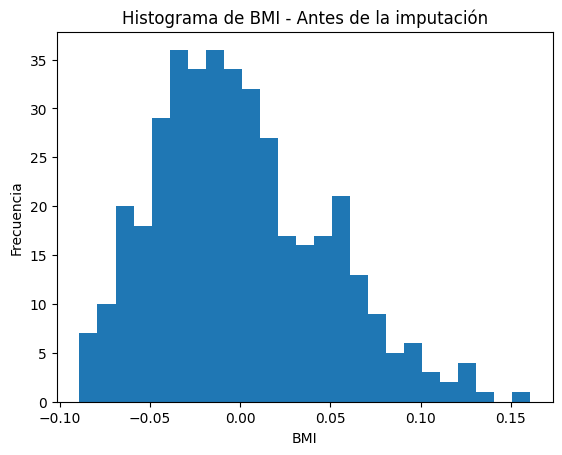

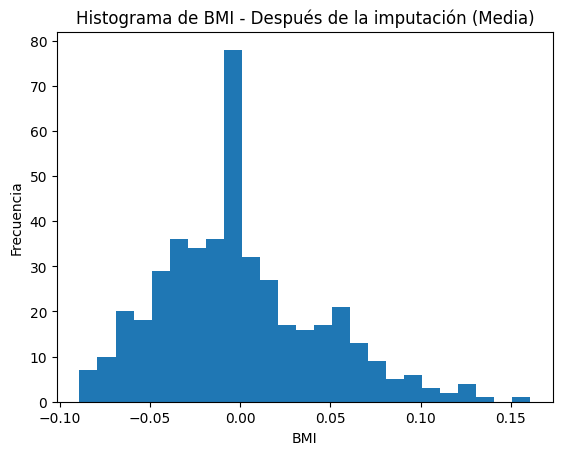

In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

diabetes = load_diabetes(as_frame=True)
data = diabetes.data.copy()

np.random.seed(42)
data_missing = data.copy()
data_missing.loc[data_missing.sample(frac=0.1).index, 'bmi'] = np.nan

bmi_before = data_missing['bmi'].dropna()

imputer = SimpleImputer(strategy='mean')
data_imputed = data_missing.copy()
data_imputed['bmi'] = imputer.fit_transform(data_missing[['bmi']])

bmi_after = data_imputed['bmi']

# Histograma antes de imputar
plt.hist(bmi_before, bins=25)
plt.title("Histograma de BMI - Antes de la imputación")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.show()

# Histograma después de imputar
plt.hist(bmi_after, bins=25)
plt.title("Histograma de BMI - Después de la imputación (Media)")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.show()
